In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import pymysql 
import warnings 
from sqlalchemy import create_engine
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# ceating database connection 
con = pymysql.connect(
host = "localhost"  ,
user = "root"       ,
password = "MYSQL",  
database = "inventory" 
)

# fetching vendor summary data 
df=pd.read_sql('select * from  vendor_sales_summary', con)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSaleQuantity,TotalSalesDollars,TotalSalePrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750,8,190.88,18,665.82,295.92,2.00,27.08,474.94,71.33,2.25,3.49
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,24.99,162,320,5440.00,24,599.76,449.82,0.52,27.08,-4840.24,-807.03,0.08,0.11
2,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750,1,105.07,0,0.00,0.00,0.00,0.48,-105.07,0.00,0.00,0.00
3,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750,39,446.16,47,704.53,494.67,37.01,367.52,258.37,36.67,1.21,1.58
4,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750,6,66.60,0,0.00,0.00,0.00,367.52,-66.60,0.00,0.00,0.00


## Exploratory Data Analysis (EDA)

After creating the **`vendor_sales_summary`** table, the next step is to perform **Exploratory Data Analysis (EDA)**.  
This process helps us understand the dataset, validate its quality, and uncover patterns or anomalies before moving on to deeper analysis.

---

### Objectives of EDA
1. **Understand column distributions**  
   - Analyze numerical columns such as `TotalPurchaseDollars`, `TotalSalesDollars`, `GrossProfit`, and `ProfitMargin`.  
   - Identify ranges, averages, and variability across vendors and brands.

2. **Check data quality**  
   - Detect missing values, inconsistent entries (e.g., negative prices, zero sales), or extremely high values.  

3. **Spot anomalies and business insights**  
   - Vendors with high sales but low profit margins.  
   - Brands with high purchase costs but no sales.  
   - Outliers in freight costs or excise taxes.

4. **Validate assumptions**  
   - Ensure calculated fields (`GrossProfit`, `ProfitMargin`, `StockTurnover`, `SalesPurchaseRatio`) align with expected business logic.  

---



In [3]:
# summary statistics 
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSaleQuantity,TotalSalesDollars,TotalSalePrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
count,42768.000000,42768.000000,42768.000000,42768.000000,42768.000000,42768.000000,4.276800e+04,42768.000000,4.276800e+04,42768.000000,42768.000000,42768.000000,4.276800e+04,42768.000000,42768.000000,42768.000000
mean,10650.649458,18039.228769,24.387506,35.645863,847.321876,3137.499252,3.001814e+04,3074.164258,4.212039e+04,18778.055190,1768.135275,61432.166186,1.210225e+04,-15.621151,1.706884,2.504376
std,18752.861380,12661.742955,109.266530,148.241530,664.281498,11073.455881,1.216976e+05,10931.840618,1.658545e+05,44839.894202,10903.380558,60937.027817,4.580741e+04,443.539722,6.020263,8.458794
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.200278e+04,-23730.640000,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,33.000000,7.292200e+02,289.710000,4.800000,14069.870000,5.292000e+01,13.320000,0.810000,1.150000
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,261.000000,5.298045e+03,2857.800000,46.570000,50293.620000,1.399640e+03,30.405000,0.980000,1.440000
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.000000,2.073824e+04,1929.000000,2.839387e+04,16054.290000,418.650000,79528.990000,8.659660e+03,39.960000,1.040000,1.670000
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,334939.000000,5.101920e+06,672819.310000,368242.800000,257032.070000,1.290668e+06,99.720000,274.500000,352.930000


In [4]:
# summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,42768.0,10650.649458,18752.861380,2.00,3951.0000,7153.000,9552.0000,201359.00
Brand,42768.0,18039.228769,12661.742955,58.00,5793.5000,18761.500,25514.2500,90631.00
PurchasePrice,42768.0,24.387506,109.266530,0.36,6.8400,10.455,19.4825,5681.81
ActualPrice,42768.0,35.645863,148.241530,0.49,10.9900,15.990,28.9900,7499.99
Volume,42768.0,847.321876,664.281498,50.00,750.0000,750.000,750.0000,20000.00
TotalPurchaseQuantity,42768.0,3137.499252,11073.455881,1.00,36.0000,262.000,1975.0000,337660.00
TotalPurchaseDollars,42768.0,30018.139977,121697.628423,0.71,453.4575,3655.465,20738.2450,3811251.60
TotalSaleQuantity,42768.0,3074.164258,10931.840618,0.00,33.0000,261.000,1929.0000,334939.00
TotalSalesDollars,42768.0,42120.389433,165854.477272,0.00,729.2200,5298.045,28393.8700,5101919.51
TotalSalePrice,42768.0,18778.055190,44839.894202,0.00,289.7100,2857.800,16054.2900,672819.31


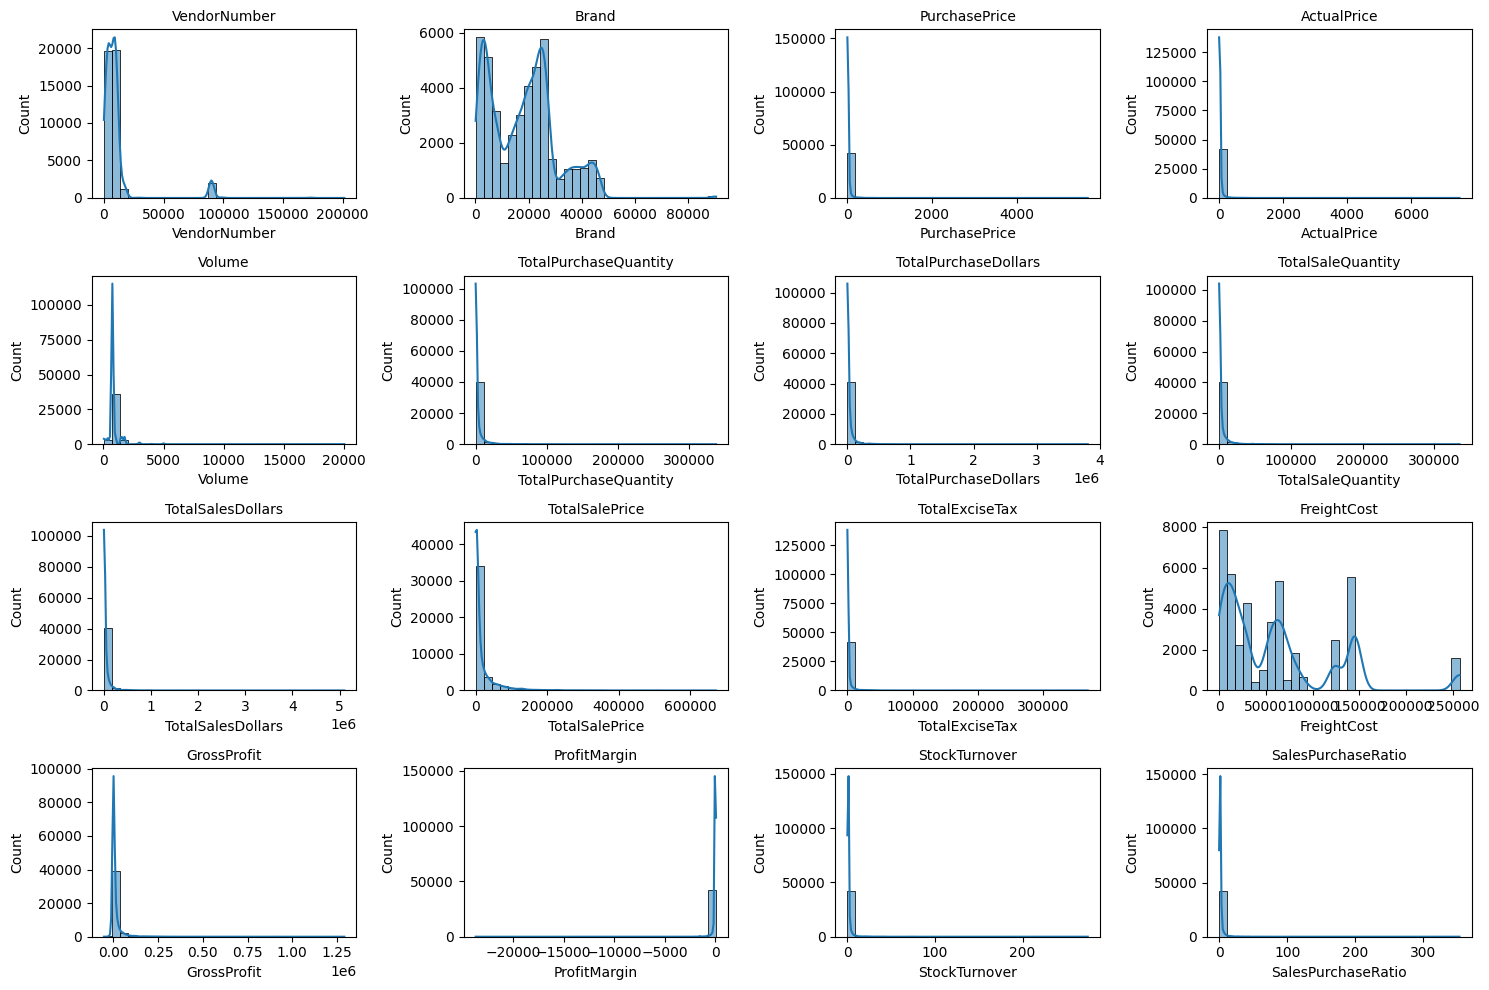

In [5]:
# distribution plot for Numerical col 
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Plot distribution of each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols): 
    plt.subplot(4, 4, i+1)  
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col, fontsize=10)
    # plt.xlabel("")
    # plt.ylabel("")

plt.tight_layout()
plt.show()

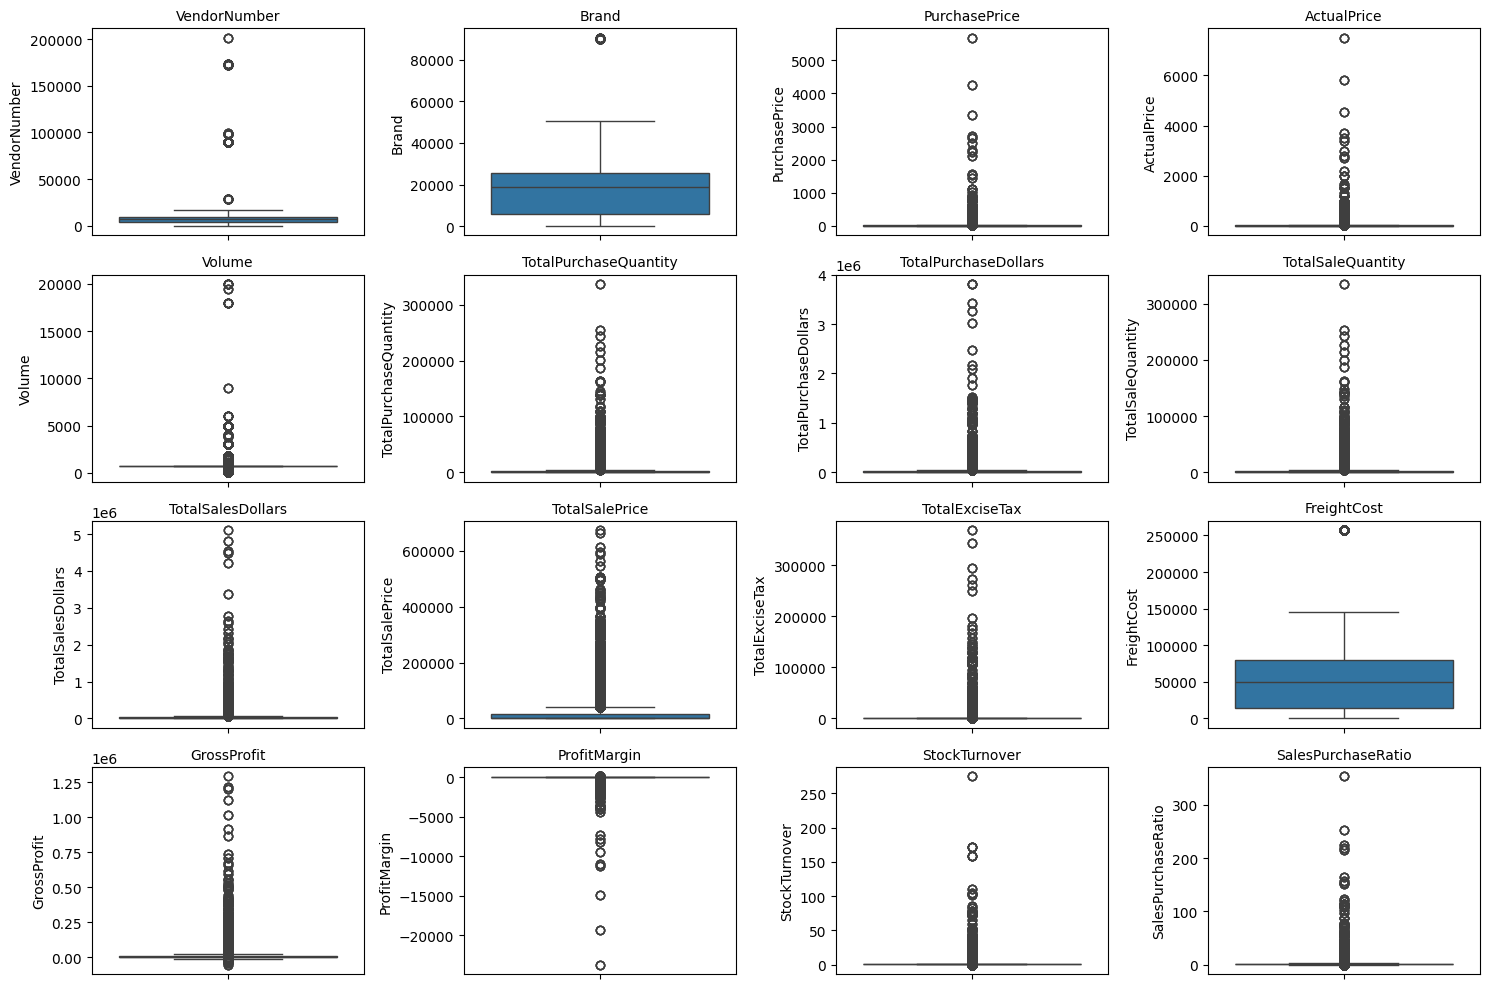

In [6]:


# Plot distribution of each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols): 
    plt.subplot(4, 4, i+1)  
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=10)
    # plt.xlabel("")
    # plt.ylabel("")

plt.tight_layout()
plt.show()



### Summary Statistics Insights

**Negative & Zero Values:**

* **Gross Profit:** Minimum value is **-52,002.78**, indicating losses. This suggests some products or transactions may be sold at a loss due to high costs or heavy discounts below purchase price.
* **Profit Margin:** The minimum is **-∞**, which points to cases where revenue is zero or even lower than costs.
* **Total Sales Quantity & Sales Dollars:** Both have minimum values of **0**, meaning some products were purchased but never sold. These could represent slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

* **Purchase & Actual Prices:** Maximum values (**5,681.81** & **7,499.99**) are much higher than their means (**24.39** & **35.64**), suggesting the presence of premium products.
* **Freight Cost:** Shows extreme variation, from **0.09** to **257,032.07**, which may indicate logistics inefficiencies or large bulk shipments.
* **Stock Turnover:** Ranges from **0 to 274.5**. Some products sell extremely fast, while others remain in stock indefinitely. A value greater than **1** indicates that sales quantity for a product is higher than the purchase quantity—likely because sales are being fulfilled from older stock.

---




In [7]:
# lets filter the data by removing incosistancies 
df=pd.read_sql(""" select * 
from vendor_sales_summary
where GrossProfit>0
AND ProfitMargin >0 
AND TotalSaleQuantity >0 """, con) 
 

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSaleQuantity,TotalSalesDollars,TotalSalePrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750,8,190.88,18,665.82,295.92,2.00,27.08,474.94,71.33,2.25,3.49
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750,39,446.16,47,704.53,494.67,37.01,367.52,258.37,36.67,1.21,1.58
2,105,ALTAMAR BRANDS LLC,2529,Right Gin,23.25,29.99,750,12,279.00,12,359.88,59.98,9.44,62.39,80.88,22.47,1.00,1.29
3,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,49.99,750,320,11427.20,307,15346.93,12947.41,242.15,62.39,3919.73,25.54,0.96,1.34
4,200,AMERICAN SPIRITS EXCHANGE,20789,Zin-phomaniac Znfdl,9.73,14.99,750,96,934.08,84,1511.16,287.84,9.43,6.19,577.08,38.19,0.88,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34251,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5,15.95,10.96,0.55,27100.41,13.31,83.45,2.50,6.04
34252,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134,65.66,1.47,7.04,50293.62,63.32,96.44,22.33,28.06
34253,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2,1.98,0.99,0.10,14069.87,0.50,25.25,1.00,1.34
34254,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72,143.28,77.61,15.12,257032.07,141.81,98.97,72.00,97.47


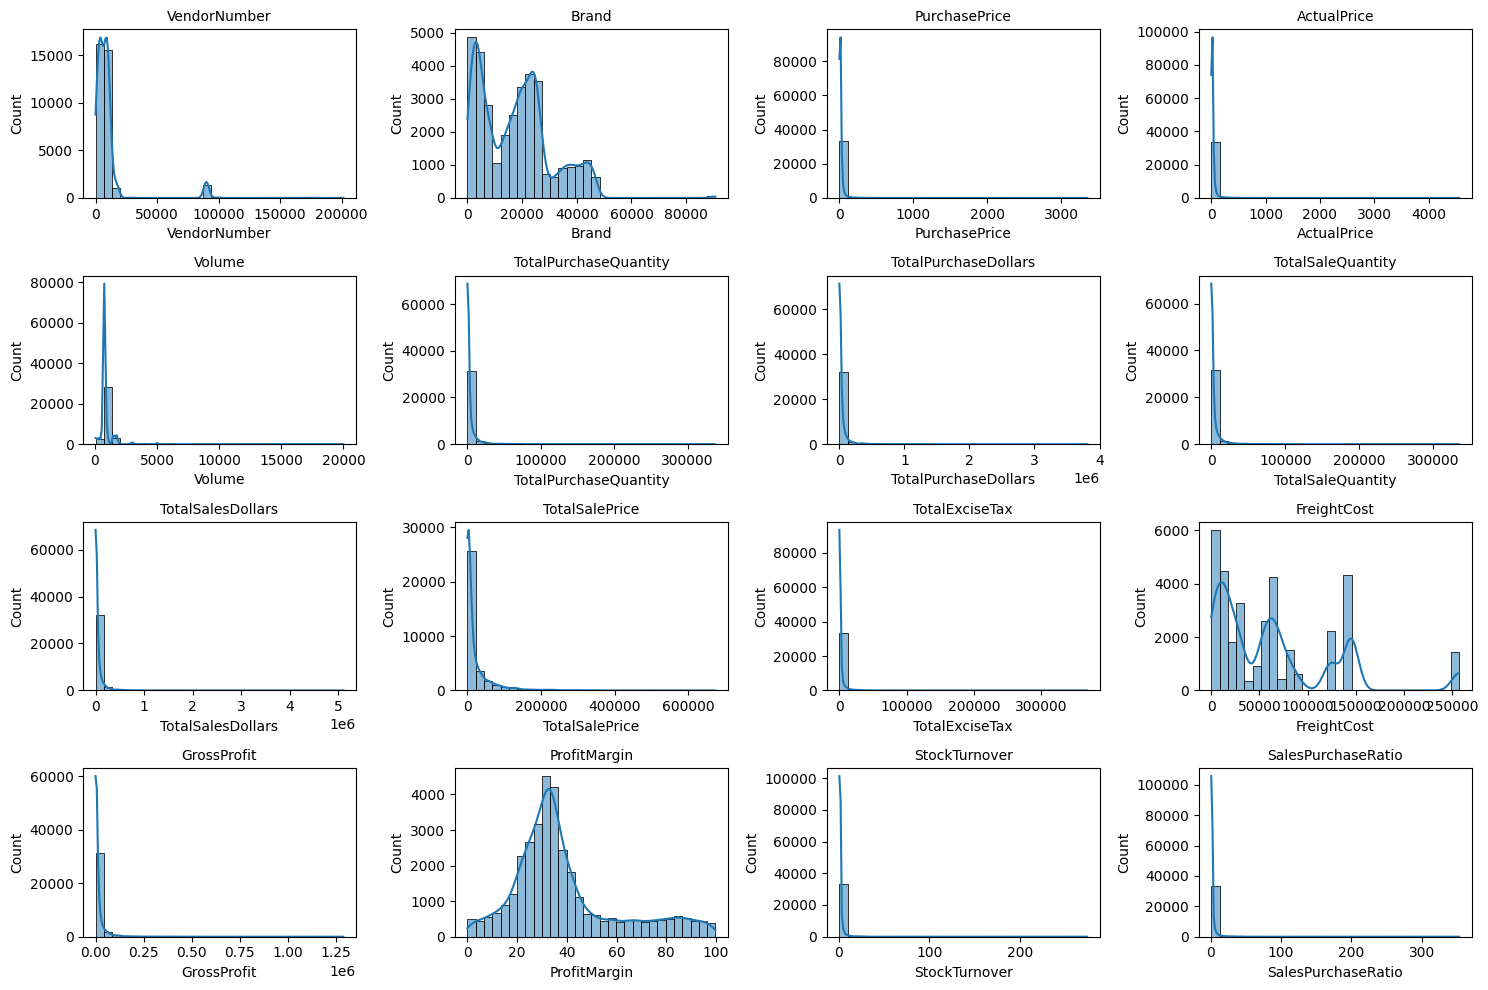

In [9]:
# distribution plot for Numerical col 
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Plot distribution of each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols): 
    plt.subplot(4, 4, i+1)  
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col, fontsize=10)
    # plt.xlabel("")
    # plt.ylabel("")

plt.tight_layout()
plt.show()

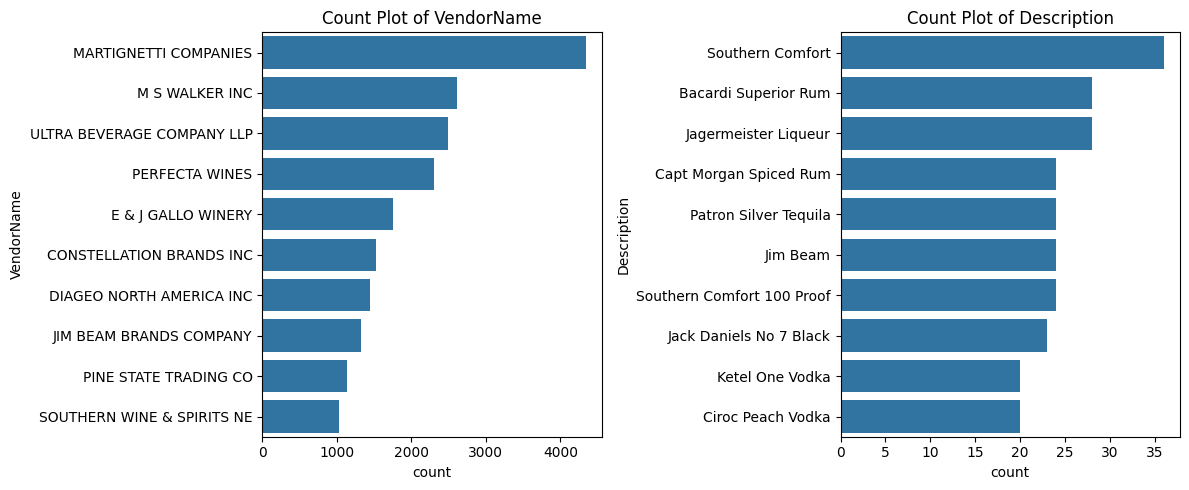

In [10]:
# count plots for categorical columns 
categorical_cols= ["VendorName" , "Description"]

plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #top 10 
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()    

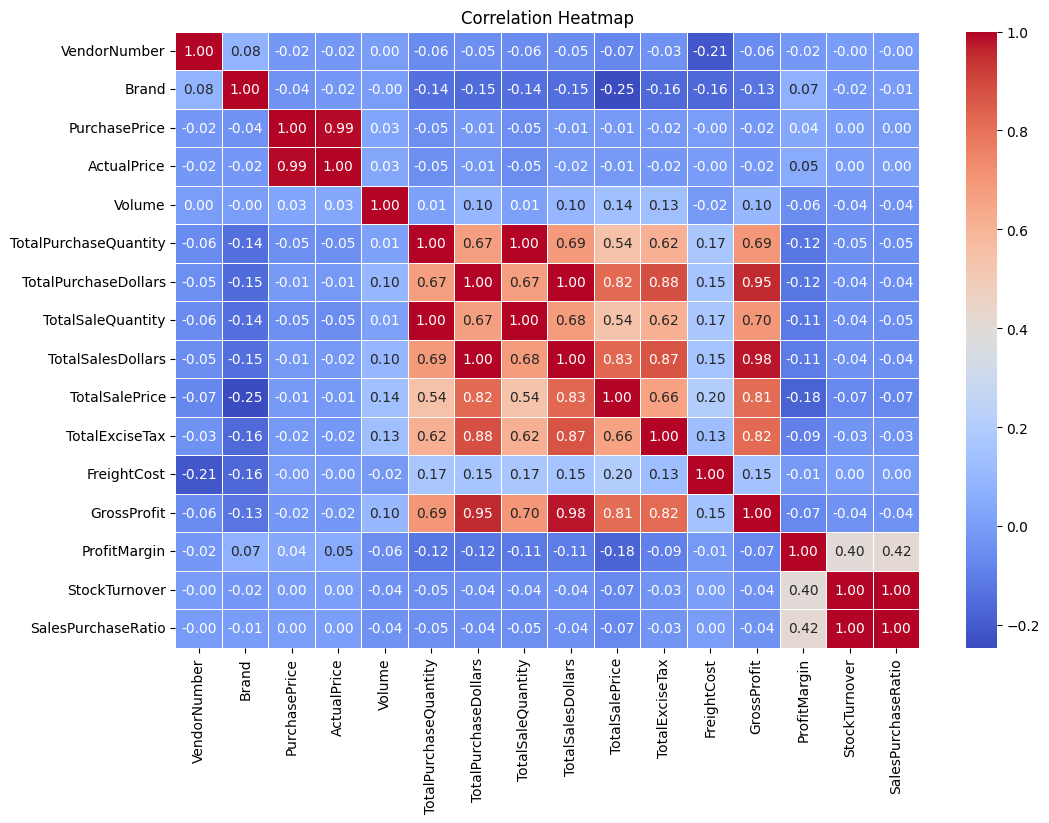

In [11]:
# corelation heatmap
plt.figure(figsize=(12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f" ,cmap="coolwarm" , linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 📊 Correlation Insights

- **PurchasePrice** has weak correlations with **TotalSalesDollars (-0.012)** and **GrossProfit (-0.016)**, suggesting that price variations do not significantly impact sales revenue or profit.  
- There is a 
**strong correlation (0.999)** between **Total Purchase Quantity** and **Total Sales Quantity**, confirming efficient inventory turnover.  
- A **negative correlation (-0.179)** between **Profit Margin** and **Total Sales Price** suggests that as sales price increases, margins decrease—possibly due to competitive pricing pressures.  
- **StockTurnover** shows weak negative correlations with both **GrossProfit (-0.038)** and **ProfitMargin (-0.055)**, indicating that faster turnover does not necessarily result in higher profitability.  


DATA Analysis
  Identify Brands that needs Promotional or pricing Adjustments which exhibit lower sales performnce  but higher profit margins. 
  

In [12]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' :'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [13]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold

np.float64(2241.428)

In [15]:
high_margin_threshold

np.float64(64.96)

In [16]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance [
    (brand_performance ['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance ['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales ut high profit  margins ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales ut high profit  margins 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,39.96,66.47
2369,Debauchery Pnt Nr,46.32,65.98
2070,Concannon Glen Ellen Wh Zin,63.80,83.45
2188,Crown Royal Apple,111.44,89.81
6237,Sauza Sprklg Wild Berry Marg,111.84,82.15
...,...,...,...
5074,Nanbu Bijin Southern Beauty,2142.72,76.75
2271,Dad's Hat Rye Whiskey,2155.56,81.85
57,A Bichot Clos Marechaudes,2159.76,67.74
6245,Sbragia Home Ranch Merlot,2199.00,66.44


In [17]:
brand_performance= brand_performance [brand_performance["TotalSalesDollars"]<10000] # for better visulization 

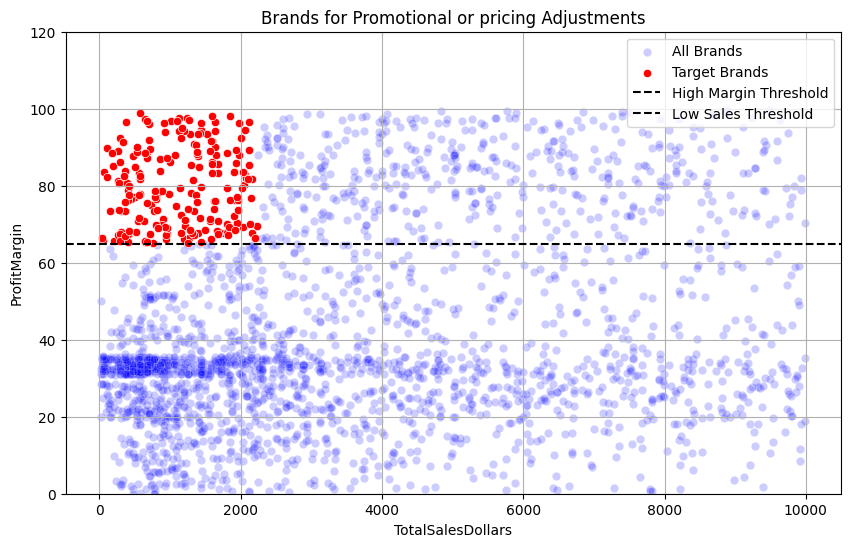

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars' , y='ProfitMargin' , color="blue" , label="All Brands", alpha=0.2) 
sns.scatterplot(data=target_brands,x='TotalSalesDollars' , y='ProfitMargin' , color="red" , label="Target Brands")

plt.axhline(high_margin_threshold , linestyle="--" , color="black" , label="High Margin Threshold")
plt.axhline(low_sales_threshold , linestyle="--" , color="black" , label="Low Sales Threshold")


plt.ylim(0, 120)
plt.yticks(range(0, 121, 20))


max_sales = int(brand_performance['TotalSalesDollars'].max())
plt.xticks(range(0, max_sales+1000, 2000))



plt.title("Brands for Promotional or pricing Adjustments")
plt.legend()
plt.grid(True) 
plt.show()

Which vendors and brands demonstrate the highest sales performance?


In [19]:
# Top Vendors and brands by sales Performance 
top_vendors =df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands =df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      2.719604e+08
MARTIGNETTI COMPANIES         1.573214e+08
PERNOD RICARD USA             1.282528e+08
JIM BEAM BRANDS COMPANY       1.256921e+08
BACARDI USA INC               9.941927e+07
CONSTELLATION BRANDS INC      9.687498e+07
E & J GALLO WINERY            7.359960e+07
BROWN-FORMAN CORP             6.788700e+07
ULTRA BEVERAGE COMPANY LLP    6.601018e+07
M S WALKER INC                5.882583e+07
Name: TotalSalesDollars, dtype: float64

In [21]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value /1_000:.2f}K"  
    else:
        return str(value)      

In [22]:
top_brands.apply(lambda x : format_dollars (x))

Description
Tito's Handmade Vodka      29.60M
Grey Goose Vodka           28.84M
Jack Daniels No 7 Black    26.76M
Capt Morgan Spiced Rum     25.43M
Absolut 80 Proof           24.98M
Jameson Irish Whiskey      22.86M
Ketel One Vodka            20.28M
Baileys Irish Cream        16.60M
Kahlua                     14.42M
Tanqueray                  13.83M
Name: TotalSalesDollars, dtype: object

In [23]:
top_brands.apply(format_dollars)

Description
Tito's Handmade Vodka      29.60M
Grey Goose Vodka           28.84M
Jack Daniels No 7 Black    26.76M
Capt Morgan Spiced Rum     25.43M
Absolut 80 Proof           24.98M
Jameson Irish Whiskey      22.86M
Ketel One Vodka            20.28M
Baileys Irish Cream        16.60M
Kahlua                     14.42M
Tanqueray                  13.83M
Name: TotalSalesDollars, dtype: object

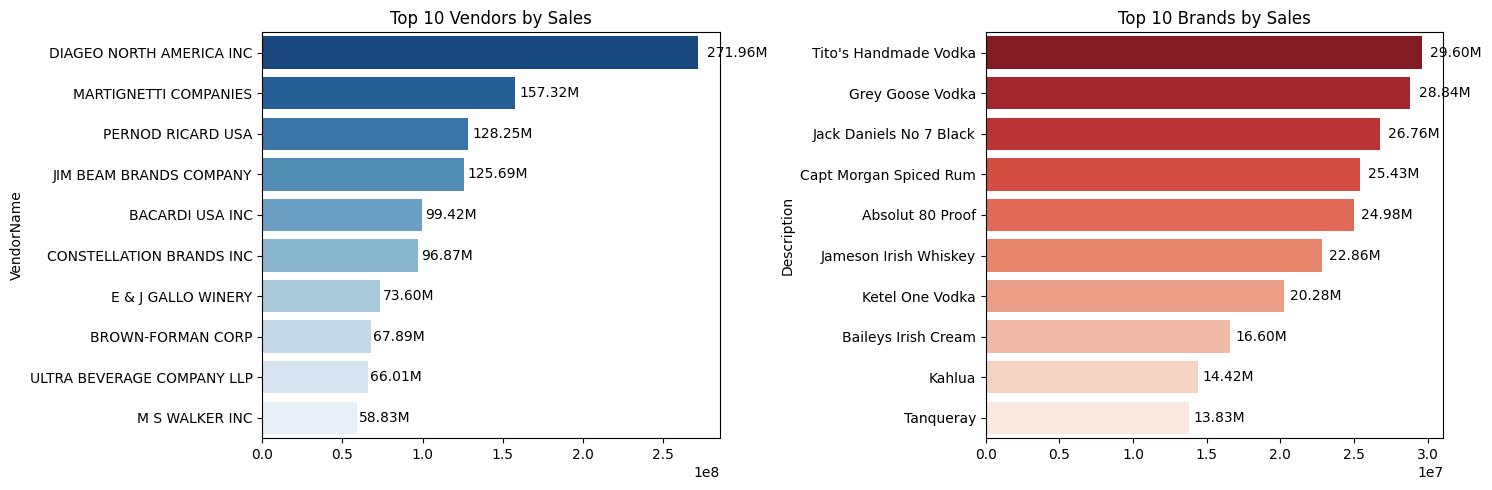

In [24]:



plt.figure(figsize=(15, 5))

# --- Plot for Top Vendors ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot( y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# --- Plot for Top Brands ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot( y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Which vendors contribute the most to total purchase dollars?
 

In [29]:
vendor_performance=df.groupby('VendorName').agg({
    "TotalPurchaseDollars" : "sum",
    "TotalSalesDollars":"sum",
    "GrossProfit":"sum"
}).reset_index()




In [40]:
vendor_performance.shape

(120, 5)

In [46]:
vendor_performance['PurchaseContribution%']=( 
vendor_performance['TotalPurchaseDollars'] 
/ vendor_performance ['TotalPurchaseDollars'].sum() *100 
).round(2)

In [47]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending=False) ,2)

In [48]:
# Dispaly top 10 vendors 
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,200.39M,271.96M,71.57M,16.35
57,MARTIGNETTI COMPANIES,102.01M,157.32M,55.31M,8.32
68,PERNOD RICARD USA,95.40M,128.25M,32.85M,7.78
46,JIM BEAM BRANDS COMPANY,93.98M,125.69M,31.71M,7.67
6,BACARDI USA INC,69.73M,99.42M,29.69M,5.69
20,CONSTELLATION BRANDS INC,61.09M,96.87M,35.78M,4.99
11,BROWN-FORMAN CORP,49.14M,67.89M,18.74M,4.01
30,E & J GALLO WINERY,48.27M,73.60M,25.33M,3.94
107,ULTRA BEVERAGE COMPANY LLP,44.67M,66.01M,21.34M,3.64
53,M S WALKER INC,39.06M,58.83M,19.77M,3.19


In [41]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.58)

In [50]:
top_vendors['Cumulative_Contribution']= (top_vendors['PurchaseContribution%'].cumsum()).round(2)
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%,Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,200.39M,271.96M,71.57M,16.35,16.35
57,MARTIGNETTI COMPANIES,102.01M,157.32M,55.31M,8.32,24.67
68,PERNOD RICARD USA,95.40M,128.25M,32.85M,7.78,32.45
46,JIM BEAM BRANDS COMPANY,93.98M,125.69M,31.71M,7.67,40.12
6,BACARDI USA INC,69.73M,99.42M,29.69M,5.69,45.81
20,CONSTELLATION BRANDS INC,61.09M,96.87M,35.78M,4.99,50.80
11,BROWN-FORMAN CORP,49.14M,67.89M,18.74M,4.01,54.81
30,E & J GALLO WINERY,48.27M,73.60M,25.33M,3.94,58.75
107,ULTRA BEVERAGE COMPANY LLP,44.67M,66.01M,21.34M,3.64,62.39
53,M S WALKER INC,39.06M,58.83M,19.77M,3.19,65.58


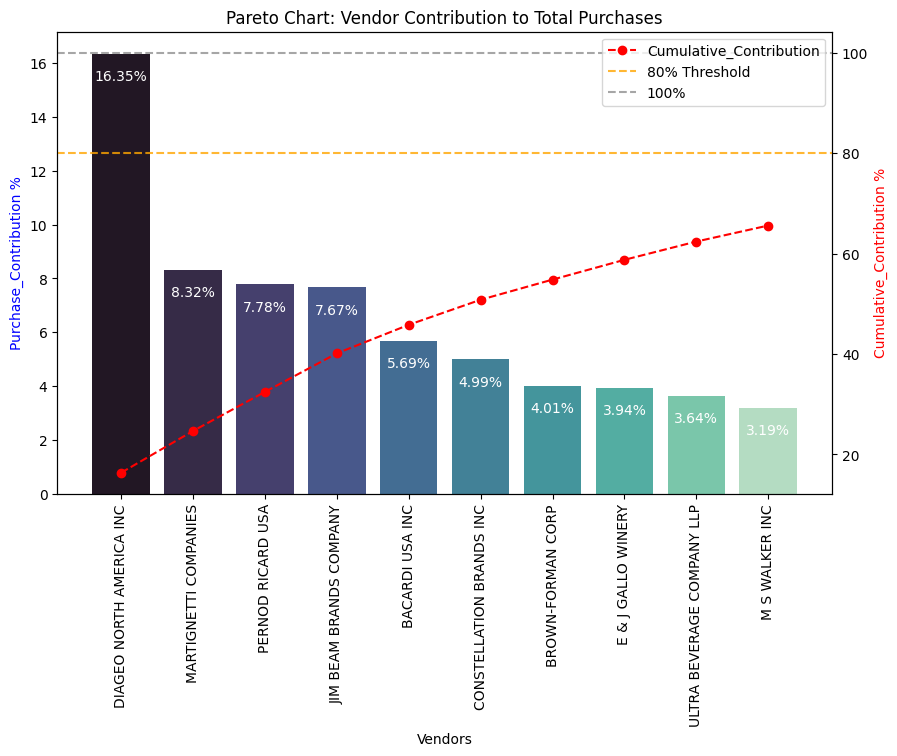

In [53]:


fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

# Add text labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative_Contribution'
)

# Axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase_Contribution %', color='blue')
ax2.set_ylabel('Cumulative_Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Reference lines at 80% and 100%
ax2.axhline(y=80, color='orange', linestyle='dashed', alpha=0.8, label='80% Threshold')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7, label='100%')

# Legend
ax2.legend(loc='upper right')

plt.show()


Ho much of total procurement is dependent on the top vendors?


In [57]:
print(f" Total Purchase Contribution of top 10  vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

 Total Purchase Contribution of top 10  vendors is 65.58 %


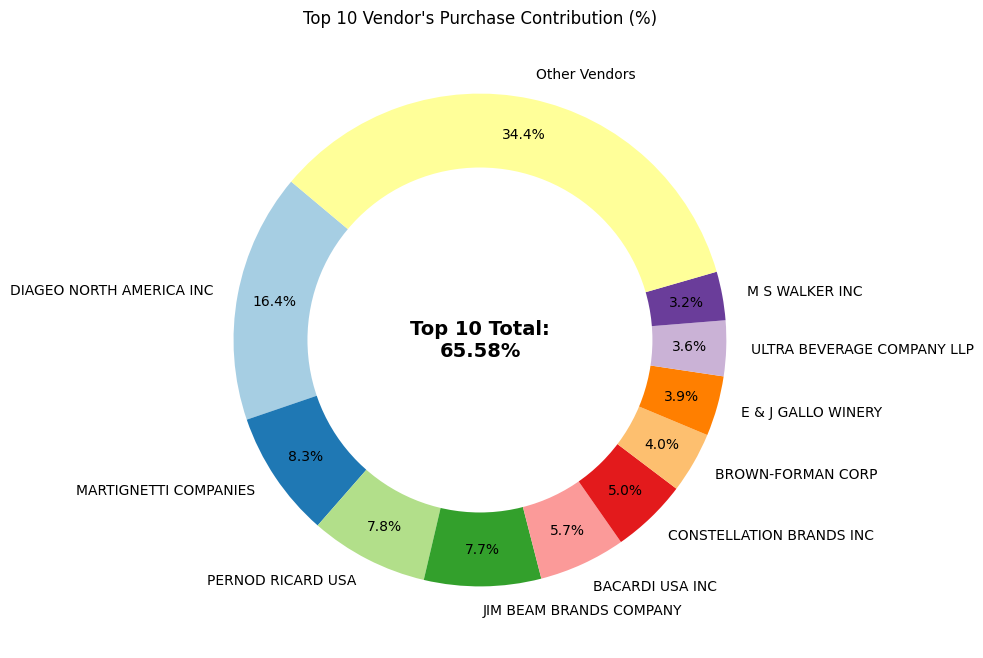

In [59]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


Does Purchasing in bulk reduce the unit price , and what is the optimal purchase volume for cost saving?


In [ ]:
df['UnitPurchasePrice']= (df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']).round(2)

In [67]:
df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'],q=3, labels=['Small' ,"Medium", "Large"])

In [70]:
df[[ 'OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Small,8
1,Small,39
2,Small,12
3,Medium,320
4,Medium,96
...,...,...
34251,Small,2
34252,Small,6
34253,Small,2
34254,Small,1


In [73]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean().round(2)

,UnitPurchasePrice
OrderSize,
Small,39.07
Medium,15.50
Large,10.78


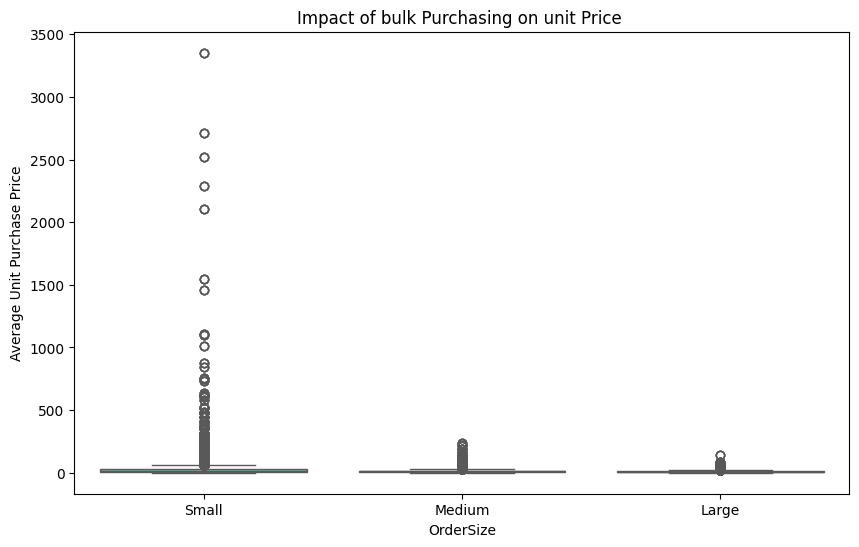

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize", y='UnitPurchasePrice',palette="Set2")
plt.title("Impact of bulk Purchasing on unit Price ")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.  
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)  
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.  


Which Vendors have low inventory turnover , indicating excess stock and slow-moving Products ?


In [77]:
df[df["StockTurnover"]<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.620000
HIGHLAND WINE MERCHANTS LLC,0.710000
PARK STREET IMPORTS LLC,0.750000
Circa Wines,0.755385
KLIN SPIRITS LLC,0.760000
Dunn Wine Brokers,0.767500
CENTEUR IMPORTS LLC,0.772500
SMOKY QUARTZ DISTILLERY LLC,0.780000
TAMWORTH DISTILLING,0.800000


How much capital is locked in unsold inventory per venor and which vendors contribute the most to it ?


In [86]:
# Ensure numeric datatypes
df["TotalPurchaseQuantity"] = pd.to_numeric(df["TotalPurchaseQuantity"], errors="coerce")
df["TotalSaleQuantity"] = pd.to_numeric(df["TotalSaleQuantity"], errors="coerce")
df["PurchasePrice"] = pd.to_numeric(df["PurchasePrice"], errors="coerce")

# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSaleQuantity"]) * df["PurchasePrice"]

# Print result
print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: 10.76M


In [87]:
# Aggregate Capital locked per Vendor 
inventory_value_per_vendor=df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# sort Vendors with the highest locked Captial 
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,2.89M
46,JIM BEAM BRANDS COMPANY,2.22M
68,PERNOD RICARD USA,1.88M
117,WILLIAM GRANT & SONS INC,1.61M
30,E & J GALLO WINERY,913.13K
79,SAZERAC CO INC,793.75K
11,BROWN-FORMAN CORP,631.31K
20,CONSTELLATION BRANDS INC,534.47K
61,MOET HENNESSY USA INC,505.91K
77,REMY COINTREAU USA INC,474.39K


What is 95% condidence intervals for profit margins of top-performing and low-performing vendors.

In [88]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

In [90]:
top_vendors=df[df["TotalSalesDollars"] >= top_threshold] ['ProfitMargin'].dropna()
low_vendors=df[df["TotalSalesDollars"] <= low_threshold] ['ProfitMargin'].dropna()

In [94]:
low_vendors

0        71.33
1        36.67
2        22.47
9        20.56
10       64.92
         ...  
34251    83.45
34252    96.44
34253    25.25
34254    98.97
34255    99.17
Name: ProfitMargin, Length: 8564, dtype: float64

In [95]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))   # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error





Top Vendors 95% CI: 30.96, 31.39 Mean: 31.17
Low Vendors 95% CI: 41.04, 42.10 Mean: 41.57


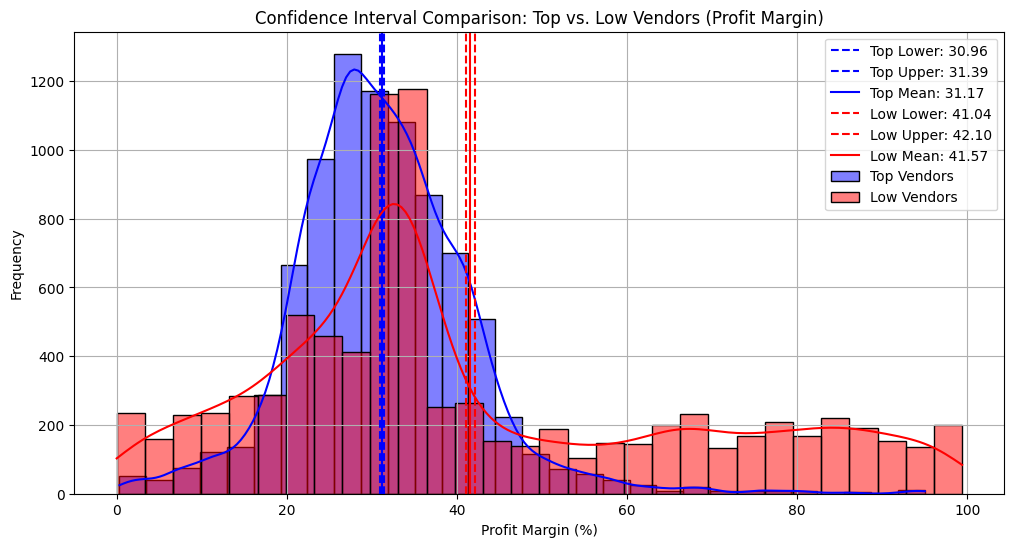

In [96]:
# Confidence Intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: {top_lower:.2f}, {top_upper:.2f} Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: {low_lower:.2f}, {low_upper:.2f} Mean: {low_mean:.2f}")


plt.figure(figsize=(12, 6))

# --- Top Vendors Plot ---
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", label=f"Top Mean: {top_mean:.2f}")

# --- Low Vendors Plot ---
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", label=f"Low Mean: {low_mean:.2f}")

# --- Finalize Plot ---
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (41.04% to 42.10%) is significantly higher than that of top-performing vendors (31.96% to 31.39%).  
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.  
- **For High-Performing Vendors**: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.  
- **For Low-Performing Vendors**: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.  



 Is there significant diffrence in profit margins between top-performing  and low_performing vendors?
Hypothesis:  

**H₀ (Null Hypothesis):** There is no significant difference in the mean profit margins of top-performing and low-performing vendors.  

**H₁ (Alternative Hypothesis):** The mean profit margins of top-performing and low-performing vendors are significantly different.  


In [97]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -35.3620, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
